In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
test = pd.read_csv('../15_modified_data/test_data.csv')
test.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-01-05 07:00:00,2019-01-05 07:00:00,232.0,1.053800,2.5,0,2.55,False,1,2019-01-05,SOUTH LAWNDALE,SOUTH LAWNDALE,2019,January,5,Saturday,7,1,0
1,2019-08-02 07:15:00,2019-08-02 07:30:00,937.0,9.922978,20.0,0,2.55,False,1,2019-08-02,NEAR WEST SIDE,CHATHAM,2019,August,2,Friday,7,1,0
2,2019-06-11 14:15:00,2019-06-11 14:45:00,1236.0,4.171590,7.5,0,2.55,True,2,2019-06-11,NORTH CENTER,LINCOLN SQUARE,2019,June,11,Tuesday,14,0,0
3,2019-04-22 09:30:00,2019-04-22 10:00:00,1093.0,4.292988,7.5,0,2.55,True,2,2019-04-22,IRVING PARK,BELMONT CRAGIN,2019,April,22,Monday,9,0,0
4,2019-08-15 15:45:00,2019-08-15 16:00:00,1246.0,4.731899,12.5,0,2.55,False,1,2019-08-15,WEST TOWN,LAKE VIEW,2019,August,15,Thursday,15,0,0


In [5]:
tip_count_0, tip_count_1 = test['nonzero_tip'].value_counts()
tip_0 = test[test['nonzero_tip'] == 0]
tip_1 = test[test['nonzero_tip'] == 1]
print('tip 0:', tip_0.shape)
print('tip 1:', tip_1.shape)

tip 0: (19710, 19)
tip 1: (4206, 19)


In [6]:
print('tip 1 %: {:.3f}'.format(tip_count_1 / (tip_count_1 + tip_count_0)))
print('tip 2 %: {:.3f}'.format(tip_count_0 / (tip_count_1 + tip_count_0)))

tip 1 %: 0.176
tip 2 %: 0.824


total class of 1 and 0: 
 0    4206
1    4206
Name: nonzero_tip, dtype: int64
TOTAL rows 8412


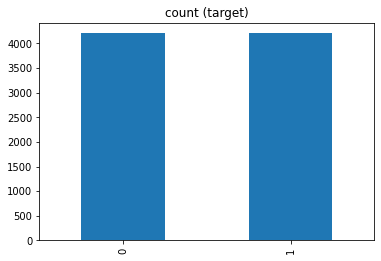

In [7]:
# Undersample
tip_0_under = tip_0.sample(tip_count_1)
test_under = pd.concat([tip_0_under, tip_1], axis=0)
print("total class of 1 and 0: \n", test_under['nonzero_tip'].value_counts())# plot the count after under-sampeling
test_under['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')
print('TOTAL rows {}'.format(len(test_under)))

In [10]:
y = test_under['nonzero_tip']
len(y)


8412

In [12]:
X = pd.get_dummies(test_under, columns = ['dropoff_community_name', 'pickup_community_name'])
X.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,...,pickup_community_name_WASHINGTON HEIGHTS,pickup_community_name_WASHINGTON PARK,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN
21131,2019-01-20 13:45:00,2019-01-20 14:00:00,996.0,2.998395,7.5,0,2.55,False,1,2019-01-20,...,0,0,0,0,0,0,0,0,1,0
13918,2019-10-08 14:30:00,2019-10-08 14:45:00,1126.0,3.798787,10.0,0,2.55,False,1,2019-10-08,...,0,0,0,0,0,0,0,0,0,0
13664,2019-01-13 11:15:00,2019-01-13 11:30:00,1024.0,4.768444,10.0,0,2.55,False,1,2019-01-13,...,0,0,0,0,0,0,0,0,0,0
8256,2019-07-11 22:00:00,2019-07-11 22:30:00,1258.0,4.596276,12.5,0,2.55,False,1,2019-07-11,...,0,0,0,0,0,0,0,0,1,0
267,2019-12-23 14:15:00,2019-12-23 14:30:00,671.0,2.853437,7.5,0,2.55,False,1,2019-12-23,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.drop(['nonzero_tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)


In [15]:
# X['nonzero_tip']

In [16]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
X['month_int'] = X['month'].map(month_map)

In [17]:
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X['day_ofweek_int'] = X['day_of_week'].map(day_map)
X['day_ofweek_int'].value_counts()

6    1536
5    1489
4    1140
7    1122
3    1115
2    1071
1     939
Name: day_ofweek_int, dtype: int64

In [18]:
X.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
log = LogisticRegression()
log.fit(X_train, y_train)
ypred = log.predict(X_test)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
accuracy_score(ypred, y_test)

1.0

In [23]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       845

    accuracy                           1.00      1683
   macro avg       1.00      1.00      1.00      1683
weighted avg       1.00      1.00      1.00      1683



In [24]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import collections
from imblearn.over_sampling import RandomOverSampler


In [25]:
test1 = pd.read_csv('../15_modified_data/test_data.csv')
test1.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-01-05 07:00:00,2019-01-05 07:00:00,232.0,1.053800,2.5,0,2.55,False,1,2019-01-05,SOUTH LAWNDALE,SOUTH LAWNDALE,2019,January,5,Saturday,7,1,0
1,2019-08-02 07:15:00,2019-08-02 07:30:00,937.0,9.922978,20.0,0,2.55,False,1,2019-08-02,NEAR WEST SIDE,CHATHAM,2019,August,2,Friday,7,1,0
2,2019-06-11 14:15:00,2019-06-11 14:45:00,1236.0,4.171590,7.5,0,2.55,True,2,2019-06-11,NORTH CENTER,LINCOLN SQUARE,2019,June,11,Tuesday,14,0,0
3,2019-04-22 09:30:00,2019-04-22 10:00:00,1093.0,4.292988,7.5,0,2.55,True,2,2019-04-22,IRVING PARK,BELMONT CRAGIN,2019,April,22,Monday,9,0,0
4,2019-08-15 15:45:00,2019-08-15 16:00:00,1246.0,4.731899,12.5,0,2.55,False,1,2019-08-15,WEST TOWN,LAKE VIEW,2019,August,15,Thursday,15,0,0


In [26]:
y1 = test1['nonzero_tip']

In [27]:
X1 = test.drop(['trip_start_timestamp', 'trip_end_timestamp', 'date', 'nonzero_tip'], axis=1)
X1.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'pickup_community_name',
       'dropoff_community_name', 'year', 'month', 'day', 'day_of_week', 'hour',
       'weekend'],
      dtype='object')

In [28]:
X1 = pd.get_dummies(X1, columns = ['dropoff_community_name', 'pickup_community_name'])
X1.head()

,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,year,month,day,...,pickup_community_name_WASHINGTON HEIGHTS,pickup_community_name_WASHINGTON PARK,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN
0,232.0,1.053800,2.5,0,2.55,False,1,2019,January,5,...,0,0,0,0,0,0,0,0,0,0
1,937.0,9.922978,20.0,0,2.55,False,1,2019,August,2,...,0,0,0,0,0,0,0,0,0,0
2,1236.0,4.171590,7.5,0,2.55,True,2,2019,June,11,...,0,0,0,0,0,0,0,0,0,0
3,1093.0,4.292988,7.5,0,2.55,True,2,2019,April,22,...,0,0,0,0,0,0,0,0,0,0
4,1246.0,4.731899,12.5,0,2.55,False,1,2019,August,15,...,0,0,0,0,0,0,0,0,1,0


In [30]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
X1['month_int'] = X1['month'].map(month_map)

In [31]:
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X1['day_ofweek_int'] = X1['day_of_week'].map(day_map)
X1['day_ofweek_int'].value_counts()


6    4350
5    4065
4    3361
7    3313
3    3121
2    2965
1    2741
Name: day_ofweek_int, dtype: int64

In [32]:
X1.drop(['day_of_week', 'month' ], axis=1, inplace=True)


In [33]:
rus = RandomUnderSampler(random_state=42, replacement=True)


In [34]:
x_rus, y_rus = rus.fit_resample(X1, y1)


In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size=0.2, random_state=0)

In [36]:
log1 = LogisticRegression()
log1.fit(X_train1, y_train1)
ypred1 = log1.predict(X_test1)
ypred1

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 1, 1])

In [37]:
accuracy_score(ypred1, y_test1)

1.0

In [38]:
print(classification_report(y_test1, ypred1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       845

    accuracy                           1.00      1683
   macro avg       1.00      1.00      1.00      1683
weighted avg       1.00      1.00      1.00      1683



In [39]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X1, y1)

In [40]:
x_ros.head()

,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,year,day,hour,...,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN,month_int,day_ofweek_int
0,232.0,1.053800,2.5,0,2.55,False,1,2019,5,7,...,0,0,0,0,0,0,0,0,1,6
1,937.0,9.922978,20.0,0,2.55,False,1,2019,2,7,...,0,0,0,0,0,0,0,0,8,5
2,1236.0,4.171590,7.5,0,2.55,True,2,2019,11,14,...,0,0,0,0,0,0,0,0,6,2
3,1093.0,4.292988,7.5,0,2.55,True,2,2019,22,9,...,0,0,0,0,0,0,0,0,4,1
4,1246.0,4.731899,12.5,0,2.55,False,1,2019,15,15,...,0,0,0,0,0,0,1,0,8,4


In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_ros, y_ros, test_size=0.2, random_state=0)

In [42]:
log2 = LogisticRegression()
log2.fit(X_train2, y_train2)
ypred2 = log2.predict(X_test2)
ypred2

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, ..., 0, 1, 0])

In [43]:
accuracy_score(ypred2, y_test2)

0.9946727549467276

In [44]:
print(classification_report(y_test2, ypred2))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3929
           1       1.00      0.99      0.99      3955

    accuracy                           0.99      7884
   macro avg       0.99      0.99      0.99      7884
weighted avg       0.99      0.99      0.99      7884



In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X1, y1)

In [46]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [47]:
log3 = LogisticRegression()
log3.fit(X_train3, y_train3)
ypred3 = log3.predict(X_test3)
ypred3

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, ..., 0, 1, 0])

In [48]:
accuracy_score(ypred3, y_test3)

0.9899797057331304

In [49]:
print(classification_report(y_test3, ypred3))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3929
           1       0.99      0.99      0.99      3955

    accuracy                           0.99      7884
   macro avg       0.99      0.99      0.99      7884
weighted avg       0.99      0.99      0.99      7884



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [51]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)

In [52]:
rf.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=20, random_state=0)

In [55]:
ypred_rf = log.predict(X_test3)
ypred_rf

array([1, 0, 1, ..., 0, 1, 0])

In [56]:
accuracy_score(ypred_rf, y_test3)

0.9998731608320649

In [57]:
print(classification_report(y_test3, ypred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3929
           1       1.00      1.00      1.00      3955

    accuracy                           1.00      7884
   macro avg       1.00      1.00      1.00      7884
weighted avg       1.00      1.00      1.00      7884

